In [69]:
import os
import pandas as pd
import numpy as np
import glob
from import_data import data
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
#%%
input = 'Input//'
output = 'Output//'
rawdata = 'Input//Rawdata//'
adjust_rawdata = 'Input//Adjust_rawdata//'
graph = 'visualization//'
graph_v = 'visualization//variable//' 
# os.mkdir(input)
# os.mkdir(output)
# os.mkdir(rawdata)
# os.mkdir(adjust_rawdata)
# os.mkdir(graph)
# os.mkdir(graph_v)

In [420]:
df = data()

c:\Users\630039\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (50,67,83,84,101) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


## define_label

In [421]:
### gender
df['gender'] = df['gender'].replace({'ชาย':'male','หญิง':'female'})
### religion Name
religion = {'พุทธ':'1',
'อิสลาม':'2',
'คริสต์':'3',
'ฮินดู':'4',
'ซิกข์':'5',
'อื่นๆ':'6'}
df['religion Name'] = df['religion Name'] .replace(religion)

In [216]:
df_na = df[df.isnull().any(axis=1)]
df_na.isnull().sum()
# df[df['religion Name'].isna()]

appl No                  0
id No                    0
Age                    351
gender                   6
religion Name          351
Country                351
education              352
marital Sts            351
occ Desc TH            448
occ Type Desc TH       826
pos Desc TH            381
bus Typ ISICName       381
src Inc                374
Wrk Year               379
pgm Secure               0
ADR01Home Own Typ      699
ADR01Home Owner        465
รายได้สุทธิต่อเดือน    803
term                   437
dtype: int64

In [390]:
def group_data(df,r,c):
    df = df[[r,c]].groupby(by=[c], dropna=False).count()    
    df.reset_index(inplace =True)
    return df

## Graph

Text(50, 400, 'Null Value = 351')

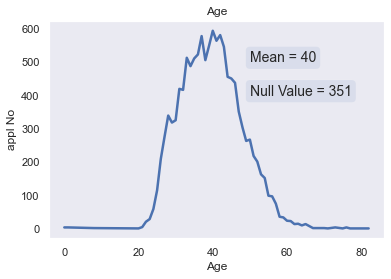

In [391]:
## Age
Age_M = round(df["Age"].mean())
df_v = group_data(df,'appl No','Age')
sns.lineplot(data=df_v, x="Age", y="appl No",linewidth=2.5).set(title='Age')
sns.set_style("darkgrid")
plt.grid()
plt.text(50, 500, f'Mean = {Age_M}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
plt.text(50, 400, f'Null Value = {df_v.iloc[62,1]}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
# plt.gcf()
# plt.savefig(graph_v+'Age.jpg') 

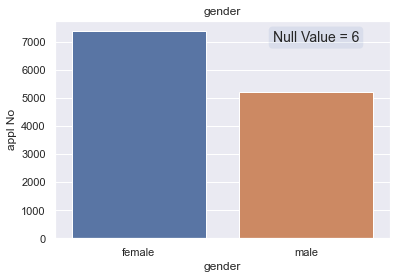

In [422]:
## Age 
df_v = group_data(df,'appl No','gender')
sns.barplot(data=df_v, x="gender", y="appl No",).set(title='gender')
sns.set_style("darkgrid")
plt.text(0.8, 7000, f'Null Value = {df_v.iloc[2,1]}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
plt.gcf()
plt.savefig(graph_v+'gender.jpg') 

Text(3, 7000, 'Null Value = 351')

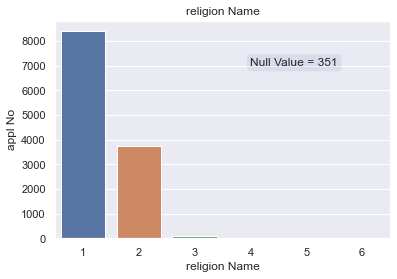

In [425]:
## religion Name 
''' religion = {'พุทธ':'1',
                'อิสลาม':'2',
                'คริสต์':'3',
                'ฮินดู':'4',
                'ซิกข์':'5',
                'อื่นๆ':'6'}'''
df_v = group_data(df,'appl No','religion Name')
sns.barplot(data=df_v, x="religion Name", y="appl No",).set(title='religion Name')
sns.set_style("darkgrid")
plt.text(3, 7000, f'Null Value = {df_v.iloc[6,1]}', fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
# plt.gcf()
# plt.savefig(graph_v+'gender.jpg') 